In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/icc-champions-trophy-cricket-dataset-1998-2017/all_champions_trophy_players_list.csv
/kaggle/input/icc-champions-trophy-cricket-dataset-1998-2017/all_champions_trophy_matches_results.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("/kaggle/input/icc-champions-trophy-cricket-dataset-1998-2017/all_champions_trophy_matches_results.csv")

In [5]:
df.head()

,Team1,Team2,Toss,Match days,Winner,Player of the Match,Margin,Ground,Match Date,ODI Int Match,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total CTs participated,Team1 Total CTs won,Team2 Total CTs participated,Team2 Total CTs won,Team1 W/L ratio over Team2
0,South Africa,West Indies,"South Africa, elected to field first",daynight,South Africa,Jacques Kallis,4 wickets,Dhaka,"Nov 1, 1998",ODI # 1364,66.58,63.42,81.50,84.92,0,0,0,0,1.000
1,India,West Indies,"India, elected to bat first",daynight,West Indies,Mervyn Dillon,6 wickets,Dhaka,"Oct 31, 1998",ODI # 1363,58.00,63.92,63.73,86.25,0,0,0,0,0.527
2,South Africa,Sri Lanka,"Sri Lanka, elected to field first",daynight,South Africa,Jacques Kallis,92 runs,Dhaka,"Oct 30, 1998",ODI # 1362,66.92,53.55,83.08,69.18,0,0,0,0,1.166
3,Pakistan,West Indies,"West Indies, elected to bat first",daynight,West Indies,Keith Arthurton,30 runs,Dhaka,"Oct 29, 1998",ODI # 1361,88.36,65.00,70.00,87.17,0,0,0,0,0.806
4,Australia,India,"Australia, elected to field first",daynight,India,Sachin Tendulkar,44 runs,Dhaka,"Oct 28, 1998",ODI # 1360,58.55,58.00,78.73,64.82,0,0,0,0,1.380


In [6]:
df.isnull().sum()

Team1                           0
Team2                           0
Toss                            0
Match days                      0
Winner                          0
Player of the Match             7
Margin                          0
Ground                          0
Match Date                      0
ODI Int Match                   0
Team1 Avg Batting Ranking       0
Team2 Avg Batting Ranking       0
Team1 Avg Bowling Ranking       0
Team2 Avg Bowling Ranking       0
Team1 Total CTs participated    0
Team1 Total CTs won             0
Team2 Total CTs participated    0
Team2 Total CTs won             0
Team1 W/L ratio over Team2      0
dtype: int64

In [7]:
df.describe()

,Team1 Avg Batting Ranking,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total CTs participated,Team1 Total CTs won,Team2 Total CTs participated,Team2 Total CTs won,Team1 W/L ratio over Team2
count,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,72.323359,73.085547,76.541875,76.826484,3.867188,0.500000,4.117188,0.578125,1.332055
std,10.963358,11.158236,9.056968,9.379781,2.388856,0.675791,2.428898,0.583357,1.793425
min,52.080000,51.750000,58.170000,58.250000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.915000,65.252500,70.287500,69.732500,2.000000,0.000000,2.000000,0.000000,0.588250
50%,71.335000,72.365000,74.730000,75.930000,4.000000,0.000000,4.000000,1.000000,0.865000
75%,79.287500,78.552500,82.165000,80.750000,6.000000,1.000000,6.000000,1.000000,1.633750
max,101.000000,101.000000,101.000000,101.000000,8.000000,2.000000,8.000000,2.000000,18.000000


In [8]:
team_match_counts = pd.concat([df['Team1'], df['Team2']]).value_counts()
team_match_counts

India           34
New Zealand     29
England         28
South Africa    27
Australia       27
Sri Lanka       27
Pakistan        25
West Indies     24
Bangladesh      14
Zimbabwe         9
Kenya            5
Afghanistan      3
Netherlands      2
U.S.A.           2
Name: count, dtype: int64

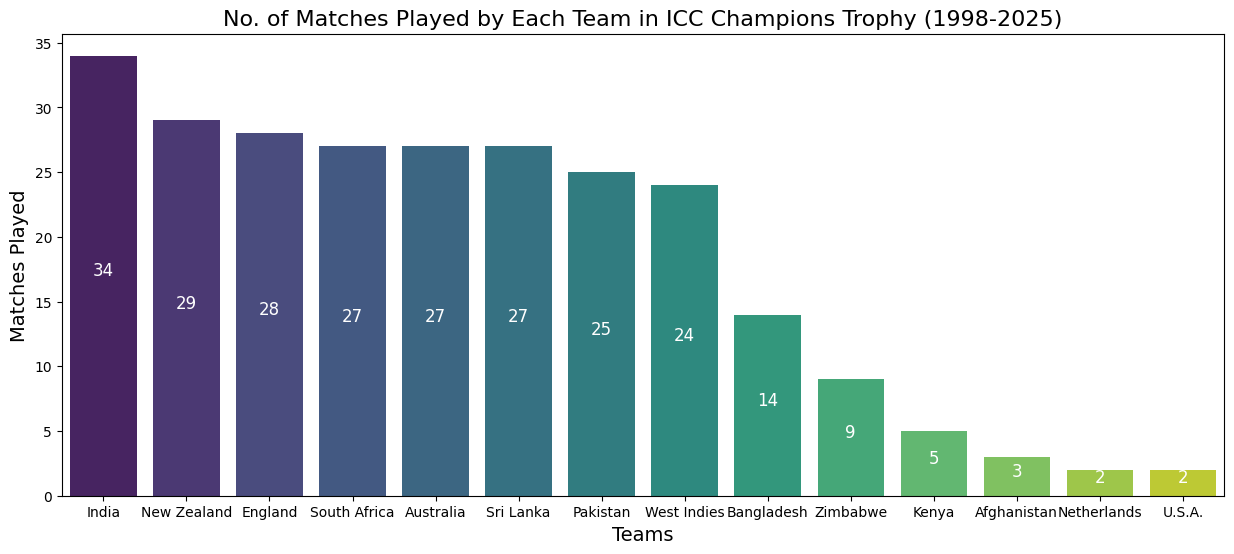

In [9]:
# Plot the bar chart
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=team_match_counts.index, y=team_match_counts.values, palette="viridis")

# Add labels on top of each bar
for i, count in enumerate(team_match_counts.values):
    ax.text(i, count/2, str(count), ha='center', fontsize=12, color = 'white')

# Customize the plot
#plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Teams", fontsize=14)
plt.ylabel("Matches Played", fontsize=14)
plt.title("No. of Matches Played by Each Team in ICC Champions Trophy (1998-2025)", fontsize=16)
#plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [10]:
total_wins = df['Winner'].value_counts()
total_wins

Winner
India           23
New Zealand     15
South Africa    14
Sri Lanka       14
England         14
West Indies     13
Australia       13
Pakistan        11
no result        7
Bangladesh       2
tied             1
Afghanistan      1
Name: count, dtype: int64

In [11]:
total_wins = total_wins[total_wins > 0]
total_wins

Winner
India           23
New Zealand     15
South Africa    14
Sri Lanka       14
England         14
West Indies     13
Australia       13
Pakistan        11
no result        7
Bangladesh       2
tied             1
Afghanistan      1
Name: count, dtype: int64

In [12]:
win_percentage = (total_wins / team_match_counts) * 100
win_percentage

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


Afghanistan     33.333333
Australia       48.148148
Bangladesh      14.285714
England         50.000000
India           67.647059
Kenya                 NaN
Netherlands           NaN
New Zealand     51.724138
Pakistan        44.000000
South Africa    51.851852
Sri Lanka       51.851852
U.S.A.                NaN
West Indies     54.166667
Zimbabwe              NaN
no result             NaN
tied                  NaN
Name: count, dtype: float64

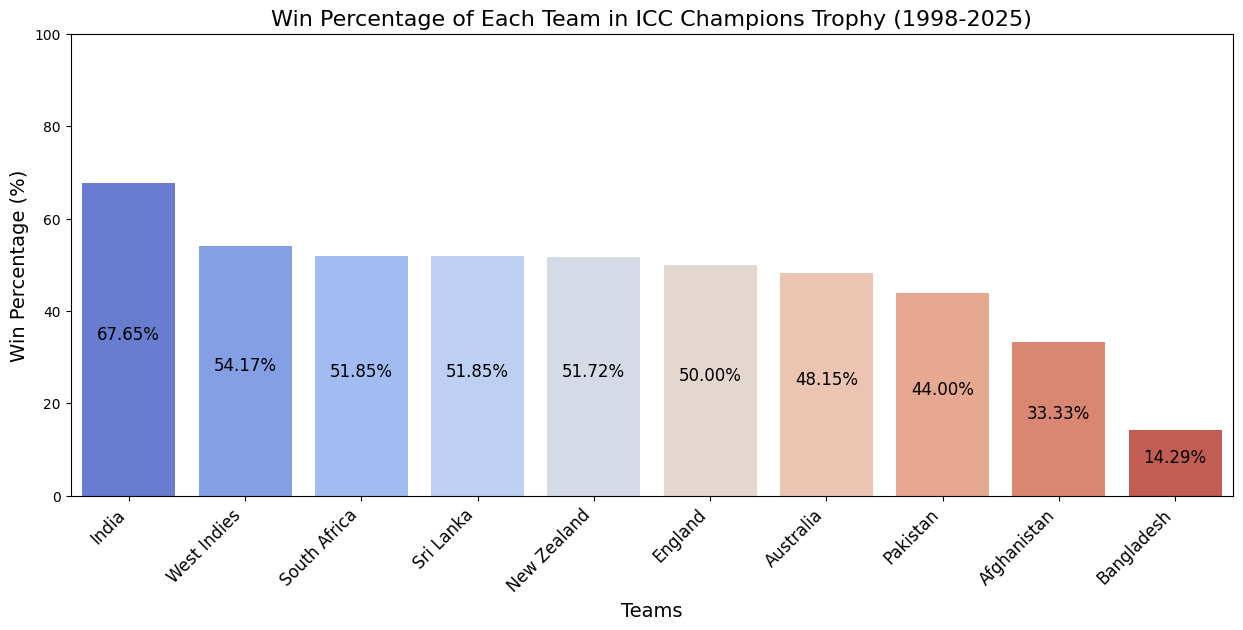

In [13]:

win_percentage = win_percentage.dropna()

# Sort by win percentage
win_percentage = win_percentage.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=win_percentage.index, y=win_percentage.values, palette="coolwarm")

# Add labels inside the bars
for i, value in enumerate(win_percentage.values):
    ax.text(i, value / 2, f"{value:.2f}%", ha='center', fontsize=12, color="black")

# Customize the plot
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel("Teams", fontsize=14)
plt.ylabel("Win Percentage (%)", fontsize=14)
plt.title("Win Percentage of Each Team in ICC Champions Trophy (1998-2025)", fontsize=16)
plt.ylim(0, 100)  # Ensuring the y-axis goes from 0 to 100
#plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Team1                         128 non-null    object 
 1   Team2                         128 non-null    object 
 2   Toss                          128 non-null    object 
 3   Match days                    128 non-null    object 
 4   Winner                        128 non-null    object 
 5   Player of the Match           121 non-null    object 
 6   Margin                        128 non-null    object 
 7   Ground                        128 non-null    object 
 8   Match Date                    128 non-null    object 
 9   ODI Int Match                 128 non-null    object 
 10  Team1 Avg Batting Ranking     128 non-null    float64
 11  Team2 Avg Batting Ranking     128 non-null    float64
 12  Team1 Avg Bowling Ranking     128 non-null    float64
 13  Team2

In [15]:
df['Match Date'] = pd.to_datetime(df['Match Date'])

In [16]:
### 1️⃣ Find the player with the most "Player of the Match" awards
most_player_awards = df['Player of the Match'].value_counts()

# ### 2️⃣ Find which team has won the most "Player of the Match" awards
# team_player_awards = df.groupby('Winner')['Player of the Match'].count().sort_values(ascending=False)

# Display results
print("🏆 Top 10 Players with Most 'Player of the Match' Awards:")
print(most_player_awards.head(4))

# print("\n🌍 Teams Winning the Most 'Player of the Match' Awards:")
# print(team_player_awards)


🏆 Top 10 Players with Most 'Player of the Match' Awards:
Player of the Match
Chris Gayle        5
Stephen Fleming    4
Jacques Kallis     3
Virat Kohli        3
Name: count, dtype: int64


In [17]:
# import pandas as pd

# # Load your dataset (Replace 'your_dataset.csv' with the actual file name)
# df = pd.read_csv("your_dataset.csv")

# Extract the numeric part of the Margin column and create two separate columns for runs and wickets
df['Runs Margin'] = df['Margin'].str.extract(r'(\d+) runs').astype(float)  # Extract runs (numeric)
df['Wickets Margin'] = df['Margin'].str.extract(r'(\d+) wickets').astype(float)  # Extract wickets (numeric)

# Filter the rows where the margin is for runs and wickets
df_runs = df.dropna(subset=['Runs Margin'])  # Only rows where 'Runs Margin' is not NaN
df_wickets = df.dropna(subset=['Wickets Margin'])  # Only rows where 'Wickets Margin' is not NaN

# # Get the top team winning by most runs (sum of 'Runs Margin')
# runs_wins = df_runs.groupby('Winner')['Runs Margin'].sum().sort_values(ascending=False).head(5)

# # Get the top team winning by most wickets (sum of 'Wickets Margin')
# wickets_wins = df_wickets.groupby('Winner')['Wickets Margin'].sum().sort_values(ascending=False).head(5)

# # Display the results
# print("🏏 Top 5 Teams Winning by Most Runs:")
# print(runs_wins)

# print("\n🎯 Top 5 Teams Winning by Most Wickets:")
# print(wickets_wins)

# # Save results to CSV (optional)
# runs_wins.to_csv("top_teams_by_runs.csv", index=True)
# wickets_wins.to_csv("top_teams_by_wickets.csv", index=True)


In [18]:
df_runs

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Team1,Team2,Toss,Match days,Winner,Player of the Match,Margin,Ground,Match Date,ODI Int Match,...,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total CTs participated,Team1 Total CTs won,Team2 Total CTs participated,Team2 Total CTs won,Team1 W/L ratio over Team2,Runs Margin,Wickets Margin
2,South Africa,Sri Lanka,"Sri Lanka, elected to field first",daynight,South Africa,Jacques Kallis,92 runs,Dhaka,1998-10-30,ODI # 1362,...,53.55,83.08,69.18,0,0,0,0,1.166,92.0,NaN
3,Pakistan,West Indies,"West Indies, elected to bat first",daynight,West Indies,Keith Arthurton,30 runs,Dhaka,1998-10-29,ODI # 1361,...,65.00,70.00,87.17,0,0,0,0,0.806,30.0,NaN
4,Australia,India,"Australia, elected to field first",daynight,India,Sachin Tendulkar,44 runs,Dhaka,1998-10-28,ODI # 1360,...,58.00,78.73,64.82,0,0,0,0,1.380,44.0,NaN
9,India,South Africa,"India, elected to bat first",day,India,Sourav Ganguly,95 runs,Nairobi (Gym),2000-10-13,ODI # 1638,...,65.43,71.71,67.21,1,0,1,1,0.500,95.0,NaN
12,New Zealand,Zimbabwe,"Zimbabwe, elected to field first",day,New Zealand,Roger Twose,64 runs,Nairobi (Gym),2000-10-09,ODI # 1635,...,76.08,74.79,75.31,1,0,0,0,2.800,64.0,NaN
14,Australia,India,"Australia, elected to field first",day,India,Yuvraj Singh,20 runs,Nairobi (Gym),2000-10-07,ODI # 1633,...,75.57,73.64,71.79,1,0,1,0,1.636,20.0,NaN
16,Sri Lanka,West Indies,"West Indies, elected to field first",day,Sri Lanka,Avishka Gunawardene,108 runs,Nairobi (Gym),2000-10-04,ODI # 1631,...,82.71,76.07,88.86,0,0,1,0,0.428,108.0,NaN
21,India,South Africa,"India, elected to bat first",daynight,India,Virender Sehwag,10 runs,Colombo (RPS),2002-09-25,ODI # 1886,...,61.93,66.00,69.47,2,0,2,1,0.518,10.0,NaN
22,Bangladesh,New Zealand,"Bangladesh, elected to field first",daynight,New Zealand,Shane Bond,167 runs,Colombo (SSC),2002-09-23,ODI # 1885,...,76.42,95.43,70.67,1,0,2,1,0.000,167.0,NaN
25,Kenya,South Africa,"South Africa, elected to bat first",daynight,South Africa,Herschelle Gibbs,176 runs,Colombo (RPS),2002-09-20,ODI # 1882,...,61.87,88.75,69.27,1,0,2,1,0.000,176.0,NaN


In [19]:
df_wickets

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Team1,Team2,Toss,Match days,Winner,Player of the Match,Margin,Ground,Match Date,ODI Int Match,...,Team2 Avg Batting Ranking,Team1 Avg Bowling Ranking,Team2 Avg Bowling Ranking,Team1 Total CTs participated,Team1 Total CTs won,Team2 Total CTs participated,Team2 Total CTs won,Team1 W/L ratio over Team2,Runs Margin,Wickets Margin
0,South Africa,West Indies,"South Africa, elected to field first",daynight,South Africa,Jacques Kallis,4 wickets,Dhaka,1998-11-01,ODI # 1364,...,63.42,81.50,84.92,0,0,0,0,1.000,NaN,4.0
1,India,West Indies,"India, elected to bat first",daynight,West Indies,Mervyn Dillon,6 wickets,Dhaka,1998-10-31,ODI # 1363,...,63.92,63.73,86.25,0,0,0,0,0.527,NaN,6.0
5,New Zealand,Sri Lanka,"Sri Lanka, elected to field first",daynight,Sri Lanka,Arjuna Ranatunga,5 wickets,Dhaka,1998-10-26,ODI # 1359,...,53.36,79.67,69.82,0,0,0,0,2.000,NaN,5.0
6,England,South Africa,"England, elected to bat first",daynight,South Africa,Daryll Cullinan,6 wickets,Dhaka,1998-10-25,ODI # 1358,...,67.83,90.45,84.67,0,0,0,0,0.600,NaN,6.0
7,New Zealand,Zimbabwe,"Zimbabwe, elected to bat first",daynight,New Zealand,Stephen Fleming,5 wickets,Dhaka,1998-10-24,ODI # 1357,...,64.55,79.92,76.00,0,0,0,0,4.000,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,England,South Africa,"England, elected to bat first",daynight,South Africa,Marco Jansen,7 wickets,Karachi,2025-03-01,ODI # 4851,...,72.33,88.87,77.00,8,0,8,1,0.882,NaN,7.0
122,Bangladesh,New Zealand,"New Zealand, elected to field first",daynight,New Zealand,Micheal Bracewell,5 wickets,Rawalpindi,2025-02-24,ODI # 4848,...,64.14,90.13,83.07,5,0,8,1,0.333,NaN,5.0
123,India,Pakistan,"Pakistan, elected to field first",daynight,India,Virat Kohli,6 wickets,Dubai (DICS),2025-02-23,ODI # 4847,...,84.00,82.13,94.47,8,2,8,1,0.780,NaN,6.0
124,Australia,England,"Australia, elected to field first",daynight,Australia,Josh Inglis,5 wickets,Lahore,2025-02-22,ODI # 4846,...,84.67,89.53,88.60,8,2,8,0,1.400,NaN,5.0


In [20]:
top_runs = df_runs.sort_values(by='Runs Margin', ascending=False).groupby('Winner').head(1).nlargest(5, 'Runs Margin')
top_runs[["Team1","Team2","Winner","Margin","Match Date"]]

,Team1,Team2,Winner,Margin,Match Date
48,New Zealand,U.S.A.,New Zealand,210 runs,2004-09-10
29,Sri Lanka,Netherlands,Sri Lanka,206 runs,2002-09-16
100,India,Pakistan,Pakistan,180 runs,2017-06-18
25,Kenya,South Africa,South Africa,176 runs,2002-09-20
30,Australia,New Zealand,Australia,164 runs,2002-09-15


In [21]:
top_wickets = df_wickets.sort_values(by='Wickets Margin', ascending=False).groupby('Winner').head(1).nlargest(5, 'Wickets Margin')
top_wickets[["Team1","Team2","Winner","Margin","Match Date"]]

,Team1,Team2,Winner,Margin,Match Date
66,Bangladesh,West Indies,West Indies,10 wickets,2006-10-11
45,Bangladesh,South Africa,South Africa,9 wickets,2004-09-12
44,Australia,U.S.A.,Australia,9 wickets,2004-09-13
13,Pakistan,Sri Lanka,Pakistan,9 wickets,2000-10-08
64,Sri Lanka,West Indies,Sri Lanka,9 wickets,2006-10-14


In [22]:
df['Toss Winner'] = df['Toss'].str.split(',').str[0]

In [23]:

toss_winner_won_match = (df['Toss Winner'] == df['Winner']).sum()

# Step 3: Calculate percentage
total_matches = len(df)
toss_win_match_win_percentage = (toss_winner_won_match / total_matches) * 100

# Print the result
print(f"🏏 Percentage of matches where Toss Winner also won the match: {toss_win_match_win_percentage:.2f}%")


🏏 Percentage of matches where Toss Winner also won the match: 42.97%


In [24]:
# Step 1: Extract Toss Winner if not already done
# df['Toss Winner'] = df['Toss'].str.split(',').str[0]

# Step 2: Count how many times each team won the toss
toss_wins = df['Toss Winner'].value_counts()

# Step 3: Count how many times the toss-winning team also won the match
toss_winner_wins = df[df['Toss Winner'] == df['Winner']]['Toss Winner'].value_counts()

# Step 4: Calculate win percentage after winning the toss
toss_win_percentage = (toss_winner_wins / toss_wins) * 100

# Print the result
print(toss_win_percentage.sort_values(ascending=False).head(9))


Toss Winner
India           78.571429
South Africa    58.333333
England         57.142857
Afghanistan     50.000000
West Indies     50.000000
Australia       46.153846
Pakistan        38.461538
Sri Lanka       37.500000
New Zealand     30.769231
Name: count, dtype: float64


In [25]:
# Step 1: Count the number of matches each team has won at each ground
ground_wins = df.groupby(['Winner', 'Ground']).size().reset_index(name='Win Count')

# Step 2: Sort each team’s wins in descending order and get the most won ground per team
most_won_grounds = ground_wins.loc[ground_wins.groupby('Winner')['Win Count'].idxmax()]

# Step 3: Display the result
print(most_won_grounds)


          Winner        Ground  Win Count
0    Afghanistan        Lahore          1
2      Australia     Centurion          3
10    Bangladesh       Cardiff          1
13       England    Birmingham          4
25         India  Dubai (DICS)          5
35   New Zealand  Johannesburg          3
42      Pakistan    Birmingham          3
55  South Africa         Dhaka          3
67     Sri Lanka      The Oval          4
74   West Indies      The Oval          3
75     no result    Birmingham          2
80          tied       Cardiff          1


In [26]:
# Step 1: Extracting win types (Runs vs Wickets)
df['Runs Win'] = df['Margin'].apply(lambda x: 1 if 'runs' in str(x) else 0)
df['Wickets Win'] = df['Margin'].apply(lambda x: 1 if 'wickets' in str(x) else 0)

# Step 2: Group by 'Winner' and count wins by Runs & Wickets
win_type_counts = df.groupby('Winner')[['Runs Win', 'Wickets Win']].sum()

# Step 3: Determine which win type is more frequent for each team
win_type_counts['Most Common Win Type'] = win_type_counts.apply(
    lambda row: 'Runs' if row['Runs Win'] > row['Wickets Win'] else 'Wickets', axis=1
)

# Step 4: Display the result
print(win_type_counts)


              Runs Win  Wickets Win Most Common Win Type
Winner                                                  
Afghanistan          1            0                 Runs
Australia            3           10              Wickets
Bangladesh           1            1              Wickets
England              8            6                 Runs
India               10           13              Wickets
New Zealand          8            6                 Runs
Pakistan             3            8              Wickets
South Africa         7            7              Wickets
Sri Lanka            6            8              Wickets
West Indies          4            9              Wickets
no result            0            0              Wickets
tied                 0            0              Wickets


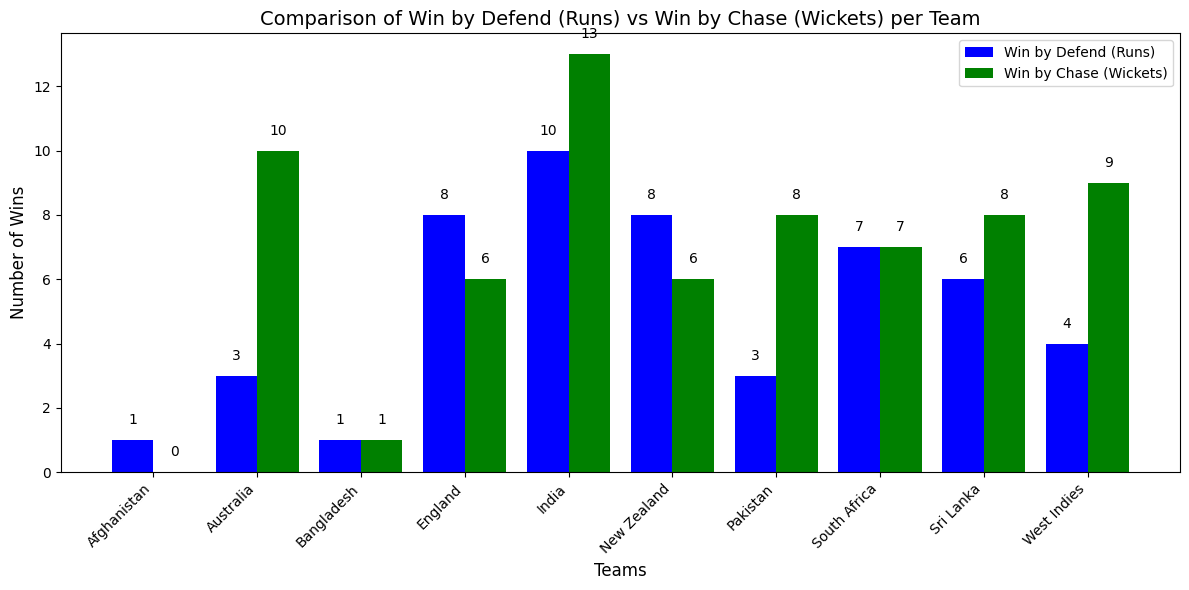

In [30]:
import matplotlib.pyplot as plt
import numpy as np

win_type_counts.rename(columns={'Runs Win': 'Win by Defend', 'Wickets Win': 'Win by Chase'}, inplace=True)

# Step 1: Filter out "No Result" and "Tied" from the Winner column
win_type_counts_filtered = win_type_counts.drop(["no result", "tied"], errors='ignore')

# Step 2: Set up bar positions
teams = win_type_counts_filtered.index
x = np.arange(len(teams))  # X positions for bars

# Step 3: Create bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bar1 = ax.bar(x - 0.2, win_type_counts_filtered['Win by Defend'], width=0.4, label='Win by Defend (Runs)', color='blue')
bar2 = ax.bar(x + 0.2, win_type_counts_filtered['Win by Chase'], width=0.4, label='Win by Chase (Wickets)', color='green')

# Step 4: Add text labels on bars
for bar in bar1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', fontsize=10)

for bar in bar2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(int(height)), ha='center', fontsize=10)

# Step 5: Formatting the plot
ax.set_xlabel("Teams", fontsize=12)
ax.set_ylabel("Number of Wins", fontsize=12)
ax.set_title("Comparison of Win by Defend (Runs) vs Win by Chase (Wickets) per Team", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(teams, rotation=45, ha="right")  # Rotate labels for better readability
ax.legend()

# Step 6: Show the plot
plt.tight_layout()
plt.show()


In [33]:
print(df.columns)

Index(['Team1', 'Team2', 'Toss', 'Match days', 'Winner', 'Player of the Match',
       'Margin', 'Ground', 'Match Date', 'ODI Int Match',
       'Team1 Avg Batting Ranking', 'Team2 Avg Batting Ranking',
       'Team1 Avg Bowling Ranking', 'Team2 Avg Bowling Ranking',
       'Team1 Total CTs participated', 'Team1 Total CTs won',
       'Team2 Total CTs participated', 'Team2 Total CTs won',
       'Team1 W/L ratio over Team2', 'Runs Margin', 'Wickets Margin',
       'Toss Winner', 'Runs Win', 'Wickets Win'],
      dtype='object')


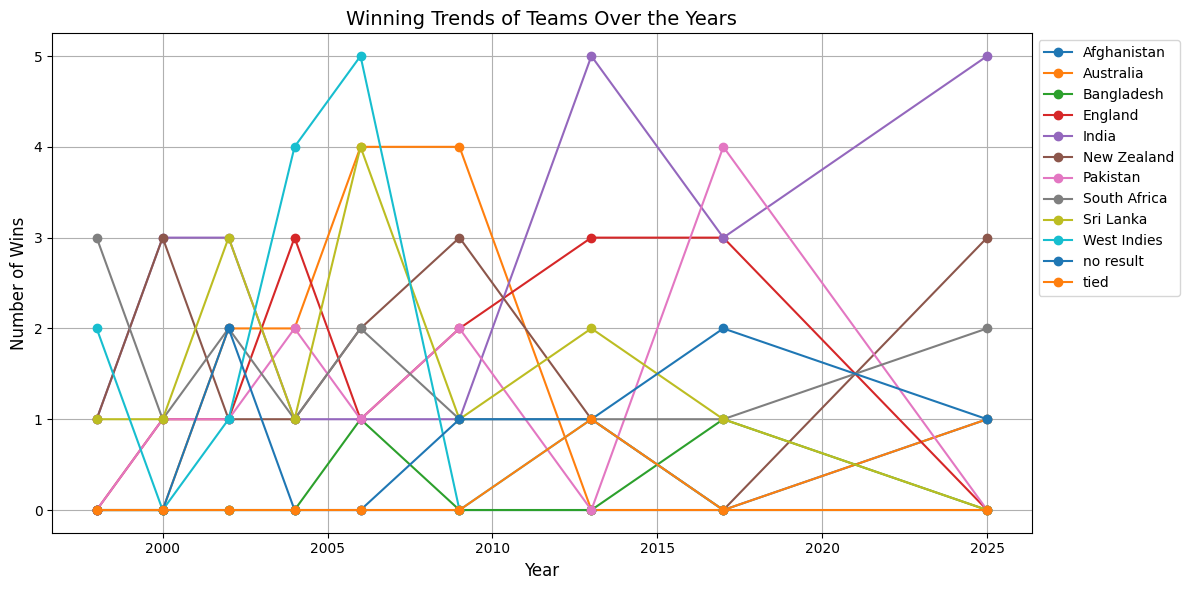

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Extract year from the date column (assuming there's a date column)
df['year'] = pd.to_datetime(df['Match Date']).dt.year  # Ensure 'date' column exists in your dataset

# Step 2: Count the number of wins for each team per year
yearly_wins = df.groupby(['year', 'Winner']).size().unstack(fill_value=0)

# Step 3: Plot the line chart
plt.figure(figsize=(12, 6))

for team in yearly_wins.columns:
    plt.plot(yearly_wins.index, yearly_wins[team], marker='o', label=team)  # Line for each team

# Step 4: Formatting
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Wins", fontsize=12)
plt.title("Winning Trends of Teams Over the Years", fontsize=14)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Move legend outside the chart
plt.grid(True)

# Step 5: Show the plot
plt.tight_layout()
plt.show()


In [37]:
import pandas as pd

# Step 1: Ensure the 'date' column is in datetime format and extract the year
# df['date'] = pd.to_datetime(df['date'])
df['year'] = df['Match Date'].dt.year

# Step 2: Sort the DataFrame by date to ensure matches are in order
df_sorted = df.sort_values(by=['year', 'Match Date'])

# Step 3: Get the last match of each year
last_matches = df_sorted.groupby('year').last()  # Gets the last match per year

# Step 4: Extract the winner of the last match for each year
winners_last_match = last_matches[['Winner']]  # Select only the winner column

# Display the results
print(winners_last_match)


            Winner
year              
1998  South Africa
2000   New Zealand
2002     no result
2004   West Indies
2006     Australia
2009     Australia
2013         India
2017      Pakistan
2025         India
